In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Hides warning

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\1429_1.csv")
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
data.shape

(34660, 21)

In [4]:
data = data[["id","reviews.text","reviews.rating"]]
data.isnull().sum()


id                 0
reviews.text       1
reviews.rating    33
dtype: int64

In [5]:
#since null  values are less we can drop null values
data=data.dropna()
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [6]:
data.isnull().sum()

id                0
reviews.text      0
reviews.rating    0
dtype: int64

## Exploratory Data Analysis

We will start be veryfing what are the most common words used in the text reviews using a word cloud. However, since we haven't done the preprocessing before we might view some words that give little meaning to the sentiment of the text.

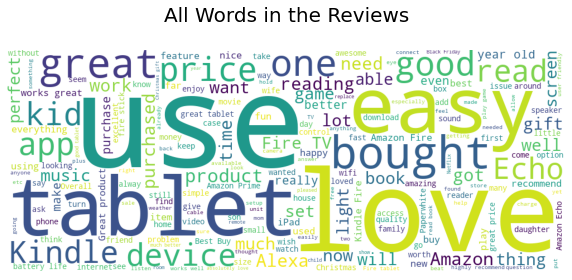

In [7]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

As expected there are words that have have no importance with the sentiment of the comment, such as: use, device, time etc. Now we will perform a word count of certain words that could describe the sentiment in a better way.

In [8]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [9]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1

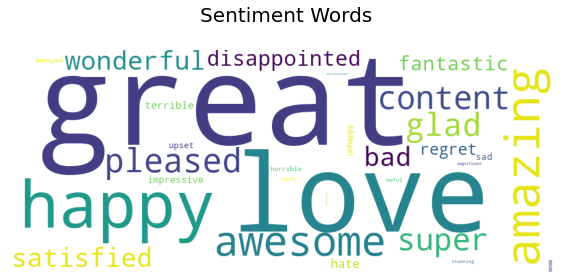

In [10]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

# Data Visualisation

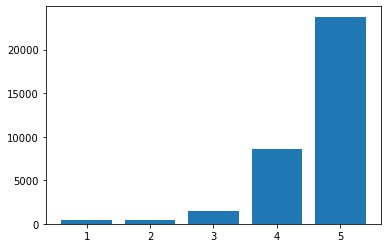

In [11]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

Due to the imbalance of our dataset, we try to add in more datas to reduce overfitting.There are very large no of positive reviews as compare to negative it can create imbalance and overfitting 


In [12]:
data1 = data.groupby("id").mean().reset_index()

In [13]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

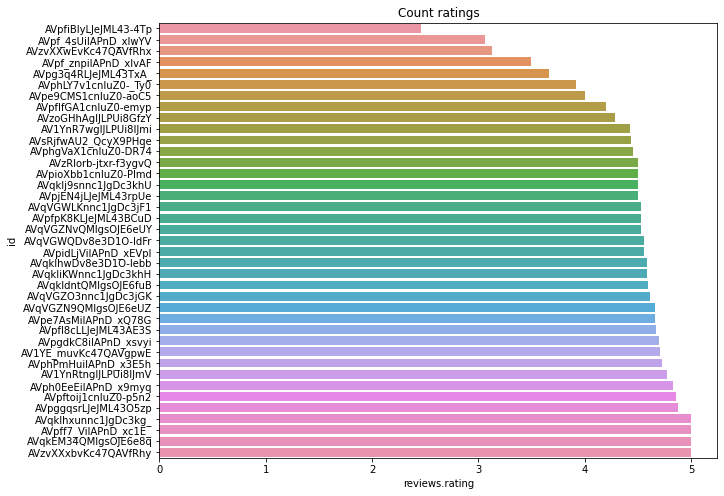

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

We can clearly see how the reviews are heavily biased towards positive reviews. 4 and 5 ratings are extremely high and the averages are all above 3. To try and balance things out I will upload the other two csv files and get only the reviews that have ratings lower or equal to 3. So we are trying to oversample the lower rating reviews.

In [17]:
from sklearn.utils import resample

# separate minority and majority classes
rating_1= data[data['reviews.rating']==1.0]
rating_2= data[data['reviews.rating']==2.0]
rating_3= data[data['reviews.rating']==3.0]
rating_4= data[data['reviews.rating']==4.0]
rating_5= data[data['reviews.rating']==5.0]

In [18]:
list_rating_data=[rating_1,rating_2,rating_3,rating_4,rating_5]
# Get a class count to understand the class imbalance.
for i in range(0,5):
    print('rating:{} - review count: '.format(i+1)+ str(len(list_rating_data[i])))

rating:1 - review count: 410
rating:2 - review count: 402
rating:3 - review count: 1499
rating:4 - review count: 8541
rating:5 - review count: 23774


In [23]:
# upsample minority
def upsample(minority):
    df= resample(minority,replace=True, # sample with replacement
                  n_samples=len(rating_5), # match number in majority class
                   random_state=23) # reproducible results
    return df
# using the upsamole function to obtain upsampled data 
upsampled_1=upsample(rating_1)
upsampled_2=upsample(rating_2)
upsampled_3=upsample(rating_3)
upsampled_4=upsample(rating_4)
# combine majority and upsampled minority
df = pd.concat([upsampled_1,upsampled_2,upsampled_3,upsampled_4,rating_5])
# check new class counts
df['reviews.rating'].value_counts()

5.0    23774
4.0    23774
3.0    23774
2.0    23774
1.0    23774
Name: reviews.rating, dtype: int64

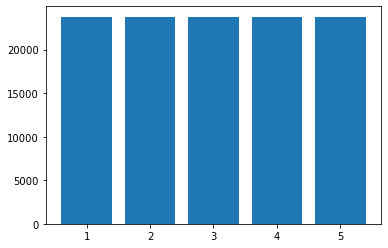

In [24]:
#now our dataset is more balance than previous datset
counts = df['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

The situation has improved a lot but hopefully it will make a difference when training the model later on. A further approach could be to undersample the positive reviews.

# Data Preprocessing
    1.BAD (0) for star rating 1 and 2.
    2.AVERAGE (1) for star rating 3.
    3.EXCELLENT (2) for star rating 4 and 5.

In [26]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

In [27]:
df

,id,reviews.text,reviews.rating,sentiment
5044,AVphgVaX1cnluZ0-DR74,I totally love the Kindle Fire tablets purchas...,1.0,0
15242,AVpjEN4jLJeJML43rpUe,Worst product ever. Constantly screwing up and...,1.0,0
3144,AVsRjfwAU2_QcyX9PHqe,"I had to buy it, what else is there to say.",1.0,0
3068,AVqkIj9snnc1JgDc3khU,Dont have option for password ask you before b...,1.0,0
15679,AVpjEN4jLJeJML43rpUe,I bought 2 of the Amazon Fire tablets because ...,1.0,0
...,...,...,...,...
34646,AVpggqsrLJeJML43O5zp,I have only used it one time to download an e-...,5.0,2
34647,AVpfiBlyLJeJML43-4Tp,Excellent charging quality with heavy duty cor...,5.0,2
34648,AVpfiBlyLJeJML43-4Tp,This charger (9W) rapid charger is as describe...,5.0,2
34649,AVpfiBlyLJeJML43-4Tp,just what i expected and just what I wanted. t...,5.0,2


## Preprocessing the data
Applying various NLP techniques - tokenize and remove all the puncuations and unnecessary jargons.

In [28]:
df["reviews.text"]=df["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
df["reviews.text"]=df["reviews.text"].str.lower()

#tokenize
words_descriptions = df["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

df['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
df['cleaned'].head()

5044     total love kindl fire tablet purchas grandkid ...
15242    worst product ever constantli screw fill ad pa...
3144                                           buy els say
3068     dont option password ask buy app author allow ...
15679    bought amazon fire tablet sale guy said great ...
Name: cleaned, dtype: object

In [29]:
df

,id,reviews.text,reviews.rating,sentiment,cleaned
5044,AVphgVaX1cnluZ0-DR74,i totally love the kindle fire tablets purchas...,1.0,0,total love kindl fire tablet purchas grandkid ...
15242,AVpjEN4jLJeJML43rpUe,worst product ever constantly screwing up and...,1.0,0,worst product ever constantli screw fill ad pa...
3144,AVsRjfwAU2_QcyX9PHqe,i had to buy it what else is there to say,1.0,0,buy els say
3068,AVqkIj9snnc1JgDc3khU,dont have option for password ask you before b...,1.0,0,dont option password ask buy app author allow ...
15679,AVpjEN4jLJeJML43rpUe,i bought of the amazon fire tablets because ...,1.0,0,bought amazon fire tablet sale guy said great ...
...,...,...,...,...,...
34646,AVpggqsrLJeJML43O5zp,i have only used it one time to download an e ...,5.0,2,use one time download e book work exactli supp...
34647,AVpfiBlyLJeJML43-4Tp,excellent charging quality with heavy duty cor...,5.0,2,excel charg qualiti heavi duti cord work kindl...
34648,AVpfiBlyLJeJML43-4Tp,this charger w rapid charger is as describe...,5.0,2,charger w rapid charger describ work well fire...
34649,AVpfiBlyLJeJML43-4Tp,just what i expected and just what i wanted t...,5.0,2,expect want thank


In [30]:
len(df[df["sentiment"]==0]),len(df[df["sentiment"]==1]), len(df[df["sentiment"]==2])

(47548, 23774, 47548)

## vectorizing the array

In [31]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df['cleaned']).toarray()
texts=pd.DataFrame(text)

## Splitting the dataset into training and testing set 

In [32]:
y=df["sentiment"].values
X=pd.DataFrame(texts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=5, max_iter=1000, random_state=0, solver='liblinear',
                   verbose=1)

In [34]:
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

Train accuracy : 92.08589215108942
Test accuracy : 91.21308993017581

 CONFUSION MATRIX
[[9572   27   93]
 [ 260 3804  734]
 [ 381  594 8309]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      9692
           1       0.86      0.79      0.82      4798
           2       0.91      0.89      0.90      9284

    accuracy                           0.91     23774
   macro avg       0.90      0.89      0.90     23774
weighted avg       0.91      0.91      0.91     23774



## Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [36]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy : 81.88146714898629
Test accuracy : 81.25262892235216

 CONFUSION MATRIX
[[9017   58  617]
 [1188 1996 1614]
 [ 754  226 8304]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      9692
           1       0.88      0.42      0.56      4798
           2       0.79      0.89      0.84      9284

    accuracy                           0.81     23774
   macro avg       0.83      0.75      0.76     23774
weighted avg       0.82      0.81      0.80     23774



## Bernoulli Naive Bayes

In [37]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

BernoulliNB()

In [38]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 75.0210313788172
Test accuracy : 74.16926053672078

 CONFUSION MATRIX
[[6761  955 1976]
 [ 374 2613 1811]
 [ 317  708 8259]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      9692
           1       0.61      0.54      0.58      4798
           2       0.69      0.89      0.77      9284

    accuracy                           0.74     23774
   macro avg       0.73      0.71      0.71     23774
weighted avg       0.76      0.74      0.74     23774



## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
print('Train accuracy :', (RF.score(X_train, y_train))*100)
print('Test accuracy :', (RF.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, RF.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, RF.predict(X_test)))

Train accuracy : 99.99369058635484
Test accuracy : 99.95793724236562

 CONFUSION MATRIX
[[9692    0    0]
 [   0 4798    0]
 [   8    2 9274]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9692
           1       1.00      1.00      1.00      4798
           2       1.00      1.00      1.00      9284

    accuracy                           1.00     23774
   macro avg       1.00      1.00      1.00     23774
weighted avg       1.00      1.00      1.00     23774

